# 4th Year Project: Main Application
`
Last Modified: 27th January 2020
Author: Ken Yew Piong, Chin Yang Tan, Jing Wei Chan, Ka Shing Liong
Department: MEng Electronic and Electrical Engineering
Institution: University College London
`

```python
# DEVELOPER NOTES
```

---
## Library Import

In [1]:
import os, math, import_ipynb, mpld3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from scipy.fftpack import fft
from scipy import signal 
from util import *

%matplotlib inline
mpld3.enable_notebook()

importing Jupyter notebook from util.ipynb


---
## 1.0 Global Parameters

In [4]:
# Global Configuration Dictionary for Plot Customisation
# use pylab.rcParams.update(params) to update settings
params = {'lines.linewidth' : 1,
          'legend.fontsize': 24,
          'legend.loc': 'best',
          'figure.figsize': (17, 10),
         'axes.labelsize': 24,
         'axes.titlesize': 24,
         'xtick.labelsize': 24,
         'ytick.labelsize': 24}

# ==============================================
# Initialisation Parameters
# ==============================================
# Filter functions presets
fs = 50 # sampling frequency
f_size = 155 # number of FIR taps for filters

# Rolling mean functions presets
window = 3 # rolling mean window
max_window = 30 # max rolling mean window size

# Plot time function presets
df_column_mapping = {
    'x' : 3,
    'y' : 4,
    'z' : 5
}
axis_listing = ['x', 'y', 'z']

---
## 2.0 Data Pre-processing and Visualisation

'/Users/kenyew/Documents/Git/Parkinson-Disease-Repository/Testground/Test 2 - Ken Yew Testground/Testground 2.0/Patient001-2019-12-05/tota-calf&heel'

'tota-lvl1-calf and heel_S2_2020-01-03T14.54.35.223_C49948A1895C_Gyroscope_1.4.5.csv'

elapsed (s)  x-axis (deg/s)  y-axis (deg/s)  z-axis (deg/s)
count    2864.0000       2864.0000       2864.0000       2864.0000
mean       28.4512          0.7338          0.4979          0.0475
std        16.4342         46.0318         15.3351         52.0083
min         0.0000       -147.9340        -65.5950       -166.3950
25%        14.2260         -3.5520         -3.9100         -1.7700
50%        28.4515          0.8230          0.2440         -0.1980
75%        42.6763          5.5180          5.6082          1.4100
max        56.9010        138.0790         57.9120        178.0870

'tota-lvl4-calf&heel_S2_2020-01-05T22.37.33.544_C49948A1895C_Accelerometer_1.4.5.csv'

elapsed (s)  x-axis (g)  y-axis (g)  z-axis (g)
count    4308.0000   4308.0000   4308.0000   4308.0000
mean       42.8018     -0.0518     -1.0434      0.0388
std        24.7206      0.0996      0.1986      0.2376
min         0.0000     -1.2710     -1.9710     -1.3460
25%        21.4000     -0.0960     -1.0650     -0.0530
50%        42.8025     -0.0510     -1.0000      0.0690
75%        64.2030     -0.0110     -0.9620      0.1670
max        85.6040      0.7180     -0.4920      0.7540

'tota-lvl3-calf&heel_S2_2020-01-05T22.33.51.316_C49948A1895C_Accelerometer_1.4.5.csv'

elapsed (s)  x-axis (g)  y-axis (g)  z-axis (g)
count    3973.0000   3973.0000   3973.0000   3973.0000
mean       39.4716     -0.0677     -1.0455      0.0913
std        22.7982      0.1055      0.2268      0.2556
min         0.0000     -0.6820     -1.9650     -1.5950
25%        19.7360     -0.1100     -1.0760     -0.0040
50%        39.4710     -0.0650     -0.9890      0.1360
75%        59.2090     -0.0280     -0.9480      0.2310
max        78.9450      0.6990     -0.4220      0.8110

'tota-lvl1-calf and heel_S2_2020-01-03T14.54.35.223_C49948A1895C_Accelerometer_1.4.5.csv'

elapsed (s)  x-axis (g)  y-axis (g)  z-axis (g)
count    2864.0000   2864.0000   2864.0000   2864.0000
mean       28.4511     -0.3735     -0.9520      0.1218
std        16.4342      0.2071      0.2088      0.2322
min         0.0000     -2.4240     -2.6250     -1.3000
25%        14.2260     -0.4400     -1.0110      0.0440
50%        28.4515     -0.3520     -0.9250      0.1810
75%        42.6763     -0.3020     -0.8280      0.2360
max        56.9010      0.7080     -0.5200      1.9380

'tota-lvl4-calf&heel_S2_2020-01-05T22.37.33.544_C49948A1895C_Gyroscope_1.4.5.csv'

elapsed (s)  x-axis (deg/s)  y-axis (deg/s)  z-axis (deg/s)
count    4308.0000       4308.0000       4308.0000       4308.0000
mean       42.8018          0.6086          1.2976          0.7361
std        24.7206         81.7802         23.7291         16.8121
min         0.0000       -249.7480       -190.8000       -100.6710
25%        21.4000         -9.2418         -6.0230         -2.1880
50%        42.8025          0.0530          1.1810         -0.2520
75%        64.2030          9.8090          9.5678          1.8690
max        85.6040        249.7480        249.7480        249.7480

'tota-lvl0-calf&heel_S2_2019-12-18T12.16.12.234_C49948A1895C_Gyroscope_1.4.5.csv'

elapsed (s)  x-axis (deg/s)  y-axis (deg/s)  z-axis (deg/s)
count    3186.0000       3186.0000       3186.0000       3186.0000
mean       31.6515          1.7395          1.0683         -0.3954
std        18.2818         20.4279         31.3563         91.1917
min         0.0000       -246.5240       -249.7480       -249.7480
25%        15.8268         -5.1030        -10.8520        -21.2252
50%        31.6515          0.7320         -0.0495         -0.2210
75%        47.4768          5.0760          4.1785         22.4162
max        63.3020        249.7480        249.7480        249.7480

'tota-lvl2-calf&heel_S2_2020-01-05T22.29.40.075_C49948A1895C_Gyroscope_1.4.5.csv'

elapsed (s)  x-axis (deg/s)  y-axis (deg/s)  z-axis (deg/s)
count    3839.0000       3839.0000       3839.0000       3839.0000
mean       38.1410          0.6618          0.9045          0.2077
std        22.0292         99.6939         21.2664         14.2744
min         0.0000       -249.7480       -112.8660        -56.2350
25%        19.0705        -12.6910         -4.7905         -2.0085
50%        38.1400          0.3960          1.1970         -0.1830
75%        57.2115         15.7885         10.8270          2.0425
max        76.2820        249.7480         73.6810         63.7880

'tota-lvl3-calf&heel_S2_2020-01-05T22.33.51.316_C49948A1895C_Gyroscope_1.4.5.csv'

elapsed (s)  x-axis (deg/s)  y-axis (deg/s)  z-axis (deg/s)
count    3974.0000       3974.0000       3974.0000       3974.0000
mean       39.4827          0.8129          0.7623          0.3781
std        22.8040         87.6527         21.5085         13.6460
min         0.0000       -249.7480       -129.8170        -64.9010
25%        19.7412        -12.0350         -6.0140         -2.1780
50%        39.4820         -0.1790          1.3640          0.0115
75%        59.2248         11.7375         10.0380          2.4523
max        78.9660        249.7480        119.2840         88.1400

'tota-lvl2-calf&heel_S2_2020-01-05T22.29.40.075_C49948A1895C_Accelerometer_1.4.5.csv'

elapsed (s)  x-axis (g)  y-axis (g)  z-axis (g)
count    3833.0000   3833.0000   3833.0000   3833.0000
mean       38.0816     -0.0689     -1.0556      0.0942
std        21.9948      0.0934      0.2366      0.2451
min         0.0000     -0.7600     -1.9270     -1.3080
25%        19.0410     -0.1060     -1.1010     -0.0420
50%        38.0820     -0.0660     -0.9880      0.1440
75%        57.1220     -0.0320     -0.9470      0.2310
max        76.1630      0.6450     -0.3810      0.8490

'tota-lvl0-calf&heel_S2_2019-12-18T12.16.12.234_C49948A1895C_Accelerometer_1.4.5.csv'

elapsed (s)  x-axis (g)  y-axis (g)  z-axis (g)
count    3186.0000   3186.0000   3186.0000   3186.0000
mean       31.6515      0.3382      0.9797     -0.1484
std        18.2818      0.3834      0.3557      0.1600
min         0.0000     -3.3880     -1.0490     -3.1070
25%        15.8268      0.2682      0.7885     -0.2050
50%        31.6515      0.3305      0.9500     -0.1180
75%        47.4768      0.5420      1.0310     -0.0810
max        63.3020      2.9760      2.8400      1.4210

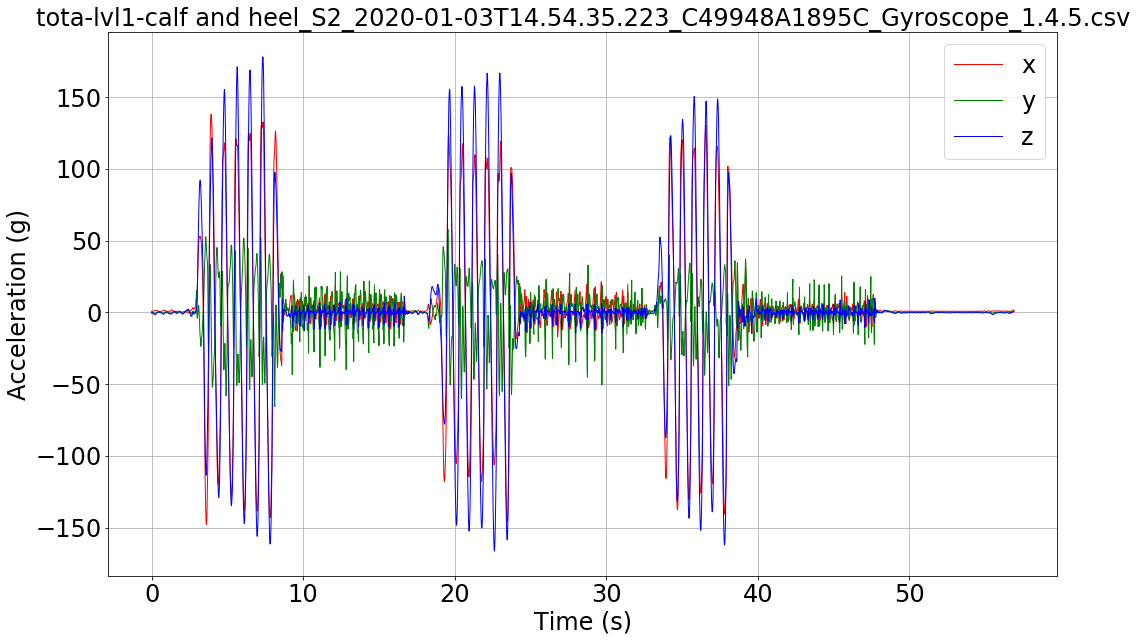

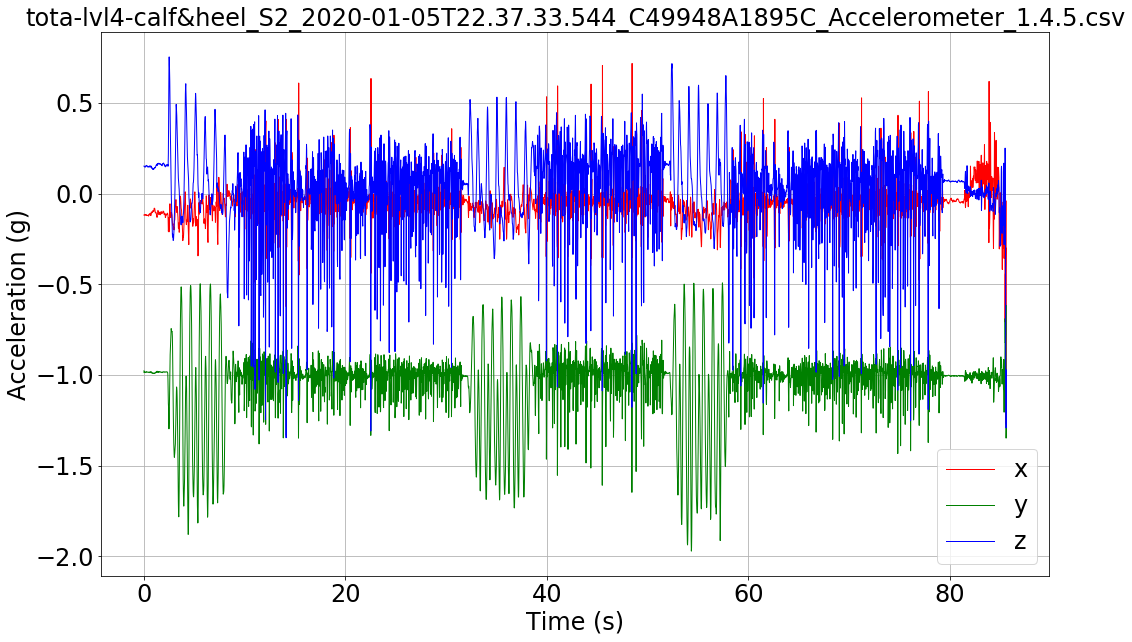

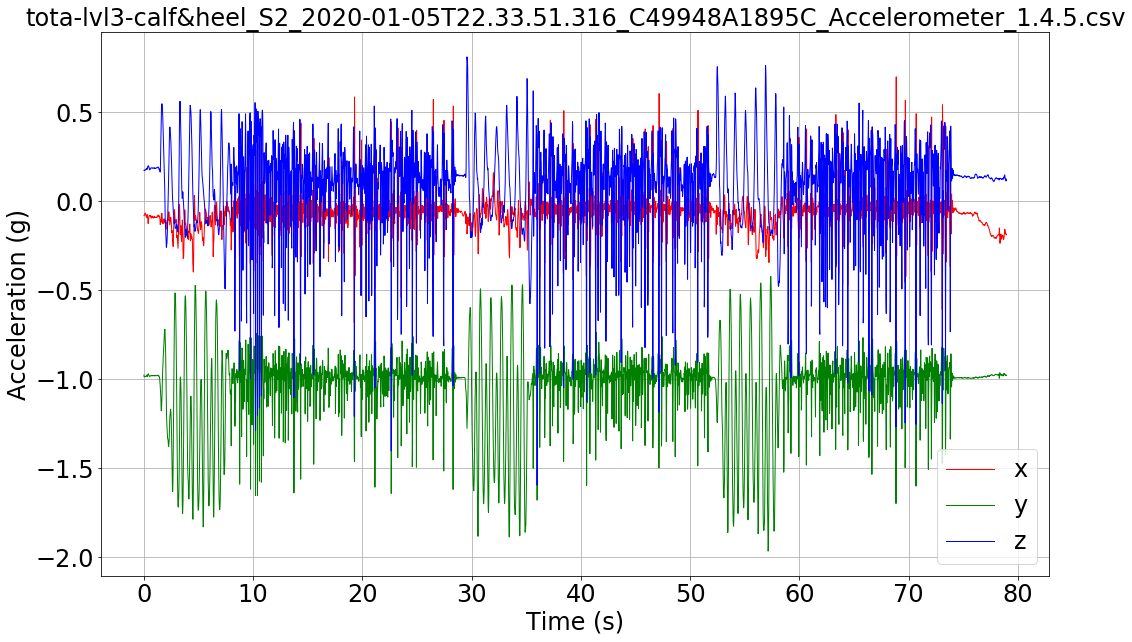

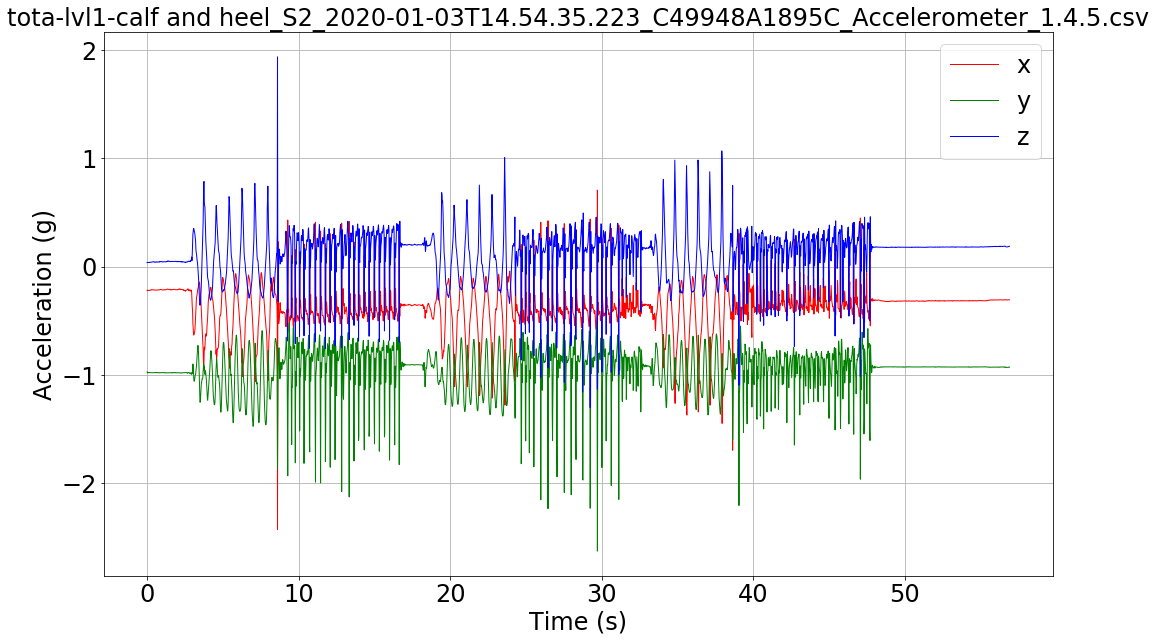

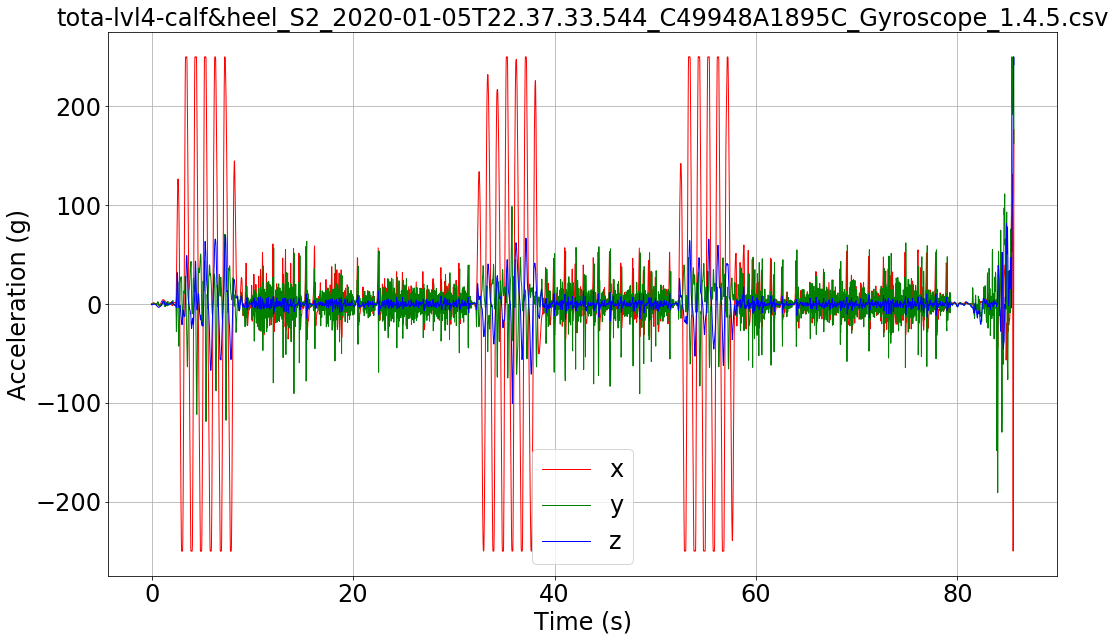

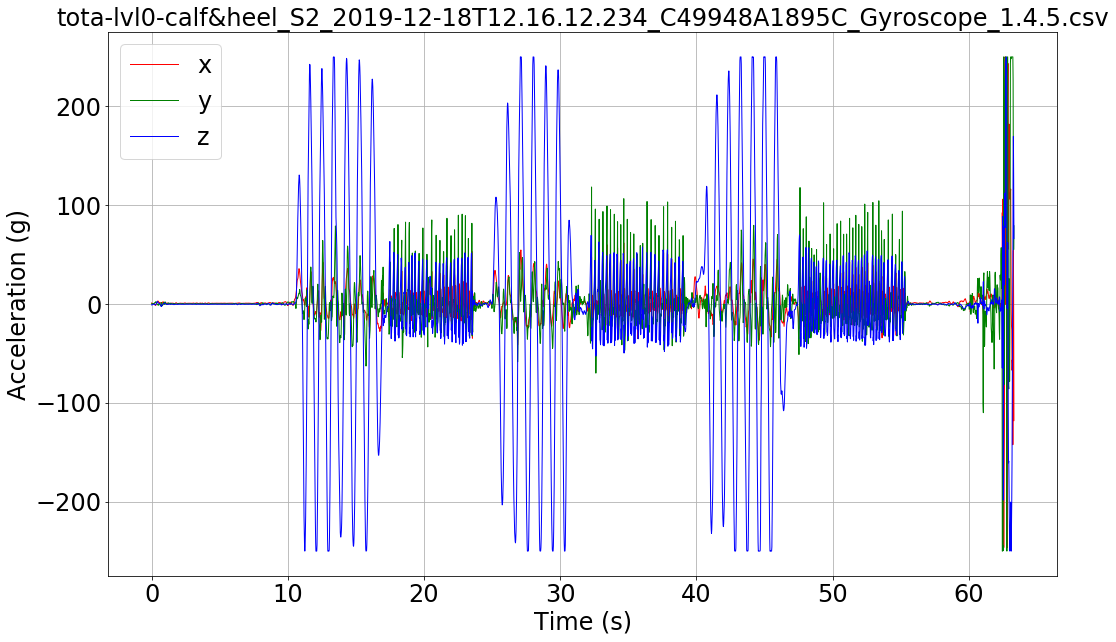

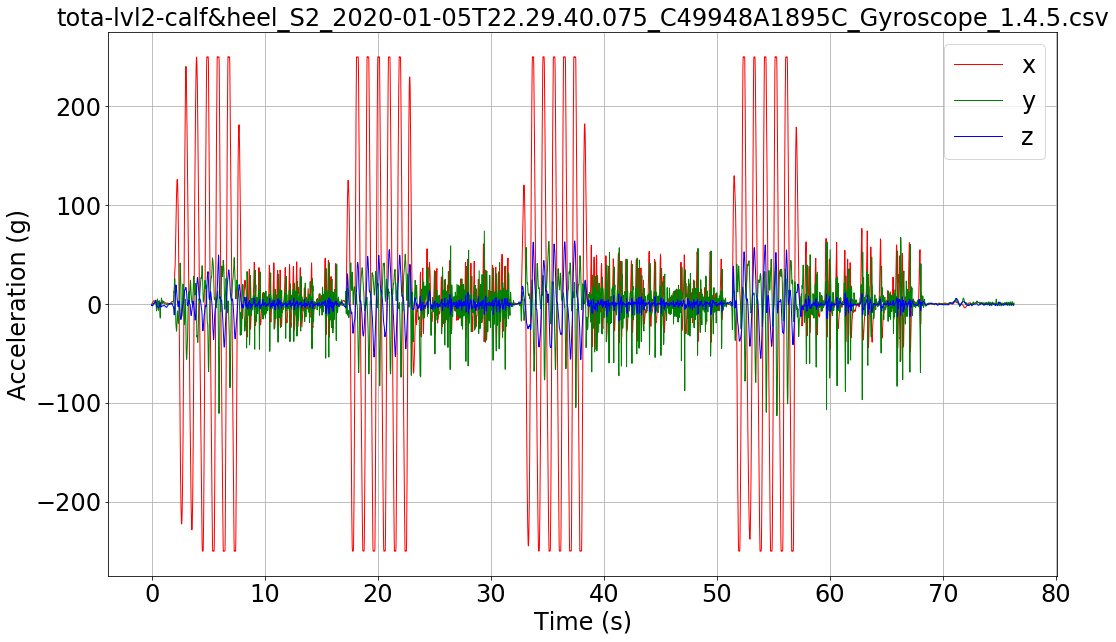

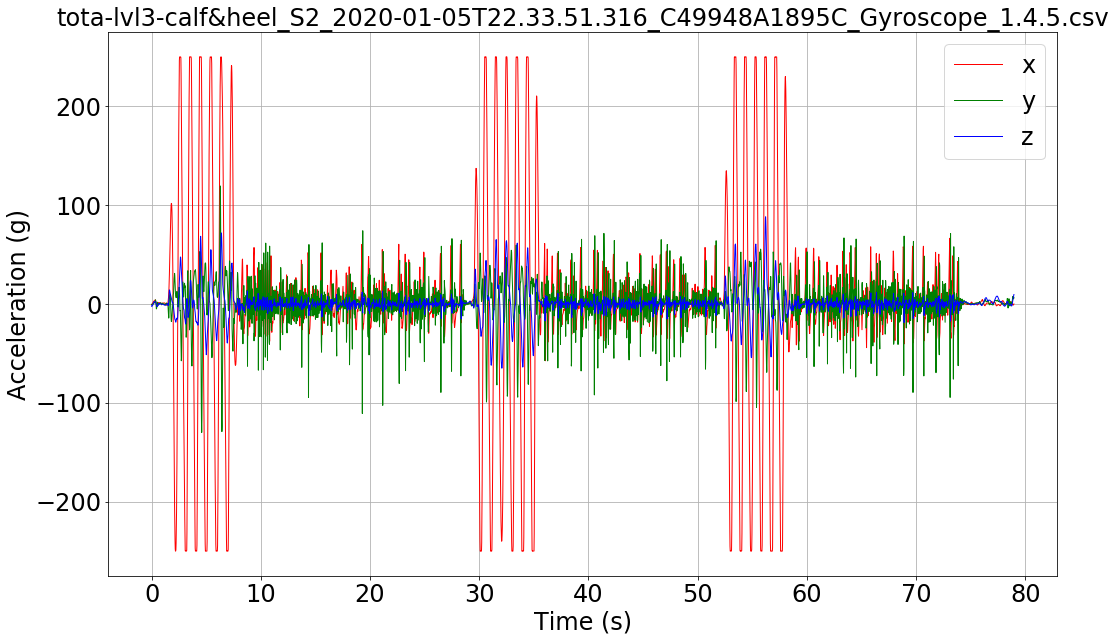

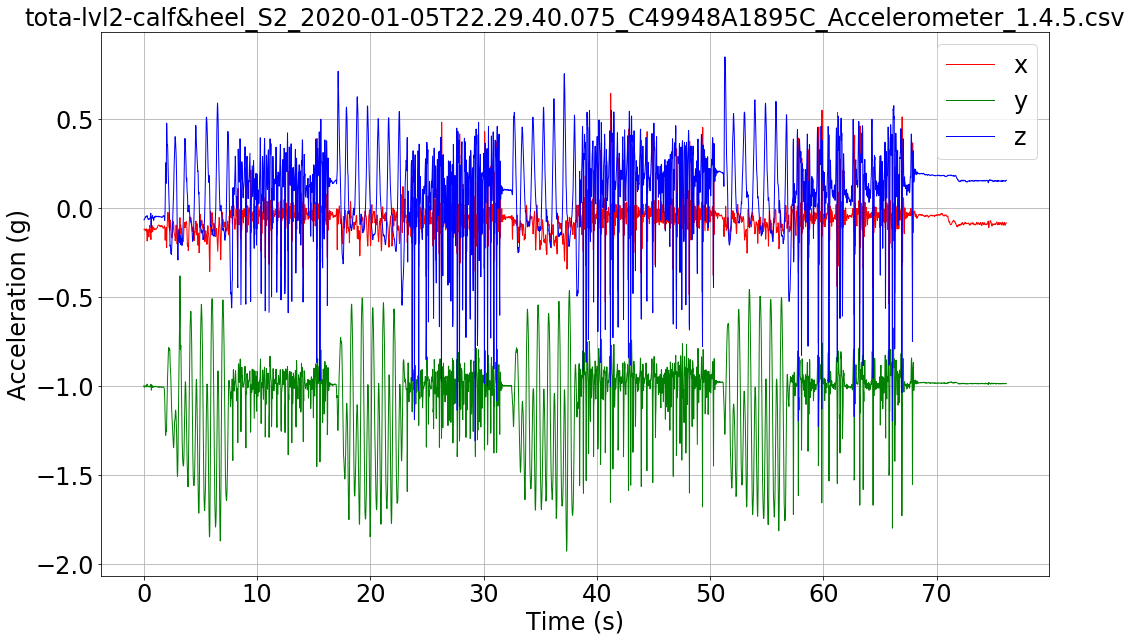

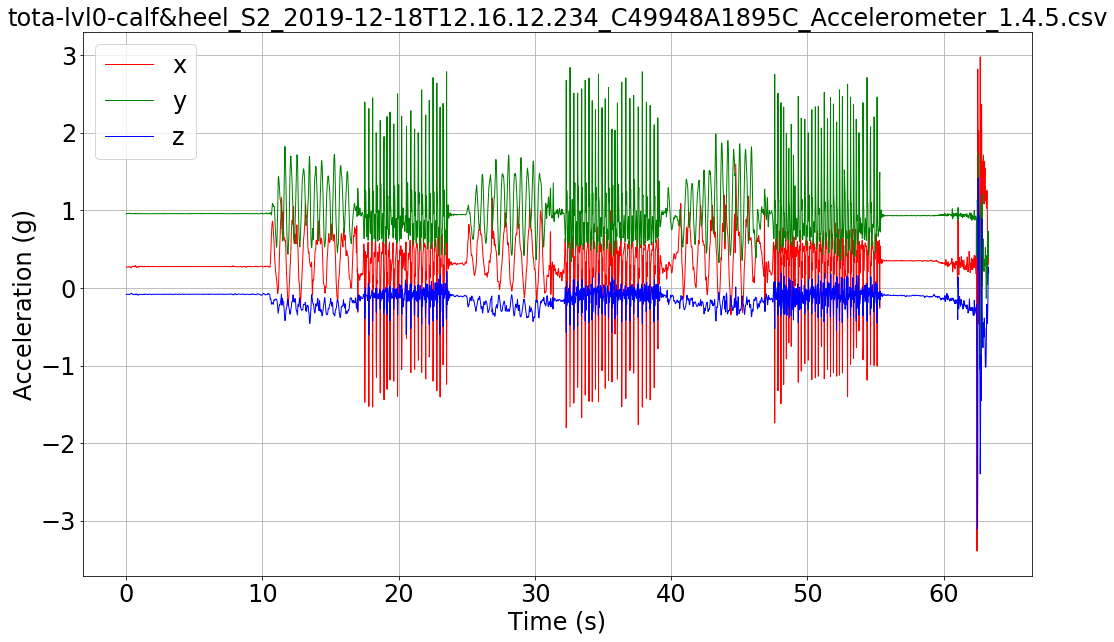

In [10]:
# ======================================================================
# Edit the input variable below to change to the folder path of interest
# ======================================================================
working_path = get_folder_path('tota-calf&heel')

# Data Overview
display(working_path)
df_tabulated_stats = tabulate_all_stats(working_path, 4, 3, 30)
# display(df_tabulated_stats)

# File and directory management
os.chdir(working_path)
directory = os.listdir()

for file in directory:
    display(file)
    df = read_csv_file(file)
    if df is None:
        continue

    # ==============================================
    # Data Pre-processing
    # ==============================================
    df_raw_stats = pd.DataFrame(collect_stats_from_unprocessed_data(df, file, 4))
    display(df_raw_stats)
    
#     df_processed = process_dataframe(df, file, window, max_window) 
#     df_processed_stats = pd.DataFrame(collect_stats_from_processed_data(df_processed, file, 4))
#     display(df_processed_stats)
    
    # ==============================================
    # Data Visualisation
    # ==============================================
    # Update plot customisation parameters
    pylab.rcParams.update(params)
    
    # Uncomment sections below to enable plots of interest
    plot_time_3_axes(df, t = file)
#     plot_magnitude_frequency(df_processed, t = file)
#     plot_frequency(df, fs, t = file)

os.chdir('..')

## 4.0 Truncated Data Analysis

In [ ]:
# # ==============================================
# # Truncated Data Analysis
# # ==============================================
# working_path = get_folder_path('ftap-forearm')
# file = 'ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Accelerometer_1.4.5.csv'

# # Data pre-processing
# df = read_csv_file(os.path.join(working_path,file))
# df_processed = process_dataframe(df, file, 3, 30)
# df_1, df_2, df_3 = truncate_dataframe(working_path, file, 22.8, 34, 50.6, 61.7, 77.9, 89)

# # Data statistics
# df_processed_stats = pd.DataFrame(collect_stats_from_processed_data(df_1, file, 4))
# df_1_stats = tabulate_stats(file, df_1, 4, 3, 30)
# df_2_stats = tabulate_stats(file, df_2, 4, 3, 30)
# df_3_stats = tabulate_stats(file, df_3, 4, 3, 30)

# display(df_processed_stats)
# display(df_1_stats)
# display(df_2_stats)
# display(df_3_stats)

# # Data visualisation
# pylab.rcParams.update(params)
# plot_magnitude_frequency(df_1, t = file)
# plot_magnitude_frequency(df_2, t = file)
# plot_magnitude_frequency(df_3, t = file)